In [1]:
import scanpy as sc
import pertpy as pt
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import distance, linkage, dendrogram
from seaborn import clustermap
import seaborn as sns
import matplotlib.pyplot as plt
import episcanpy as epi
from scipy import stats
import edistance as ed
from utils import equal_subsampling

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


ryp2 is not installed. Install with pip install rpy2 to run tools with R support.

In [2]:
def process_rna_adata(adata):
    adata.layers['counts'] = adata.X.copy()

    # basic qc and pp
    sc.pp.filter_cells(adata, min_counts=1000)
    sc.pp.normalize_per_cell(adata)
    sc.pp.filter_genes(adata, min_cells=50)
    #sc.pp.filter_genes(adata, min_cells=3)  # sanity cleaning

    n_var_max = 2000  # max total features to select
    sc.pp.highly_variable_genes(adata, n_top_genes=n_var_max, subset=False, flavor='seurat_v3', layer='counts')
    sc.pp.log1p(adata)

    sc.pp.pca(adata, use_highly_variable=True)
    sc.pp.neighbors(adata)

    adata.uns['processed'] = True
    return(adata)

In [9]:
adata = sc.read_h5ad("/n/groups/marks/projects/scperturb/datasets/PapalexiSatija2021_eccite_RNA/PapalexiSatija2021_eccite_RNA.h5ad")

In [10]:
adata = process_rna_adata(adata)

In [14]:
adata = equal_subsampling(adata, obs_key = "perturbation", N_min = 200) 

AnnData object with n_obs × n_vars = 9400 × 15987
    obs: 'hto', 'guide_id', 'hto_barcode', 'gdo_barcode', 'perturbation', 'tissue_type', 'cell_line', 'cancer', 'disease', 'perturbation_type', 'celltype', 'organism', 'nperts', 'ngenes', 'ncounts', 'percent_mito', 'percent_ribo', 'n_counts'
    var: 'ensembl_id', 'ncounts', 'ncells', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'log1p', 'pca', 'neighbors', 'processed'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [29]:
dists = {}
dists['mmd'] = pt.tools.Distance(metric='mmd')
dists['pseudobulk'] = pt.tools.Distance(metric='pseudobulk')
dists['wasserstein'] =  pt.tools.Distance(metric='wasserstein')


In [31]:
dist_dfs = {}
for key in dists:
    dist_dfs[key] = dists[key].pairwise(adata, groupby='perturbation')

Output()

Output()

Output()

In [ ]:
dist_dfs['edist']=ed.pairwise_pca_distances(adata, "perturbation", correction_factor=True)

In [35]:
dist_dfs['mmd'].to_csv("output/metric-comp-papalexi/mmd.csv")
dist_dfs['pseudobulk'].to_csv("output/metric-comp-papalexi/pseudobulk.csv")
dist_dfs['wasserstein'].to_csv("output/metric-comp-papalexi/wasserstein.csv")
adata.write("output/metric-comp-papalexi/papalexi_processed_subset.h5ad")

In [21]:
pb_df = dist_pseudobulk.pairwise(adata, groupby= 'perturbation')

Output()

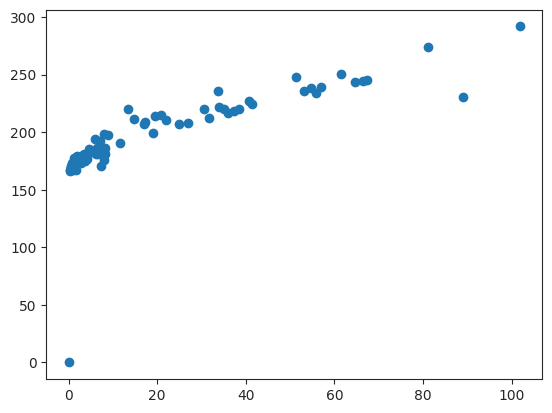

In [36]:
plt.scatter(dist_dfs['mmd']['control'],dist_dfs['wasserstein']['control'])

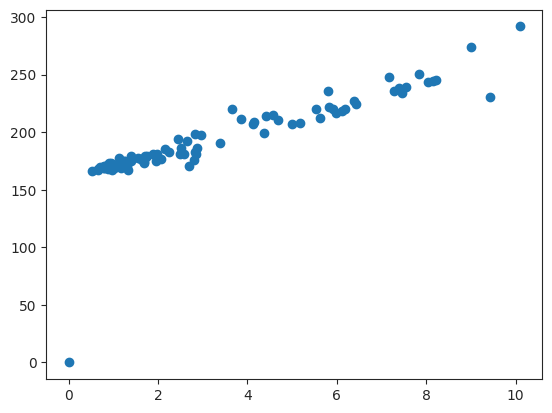

In [37]:
plt.scatter(dist_dfs['pseudobulk']['control'],dist_dfs['wasserstein']['control'])

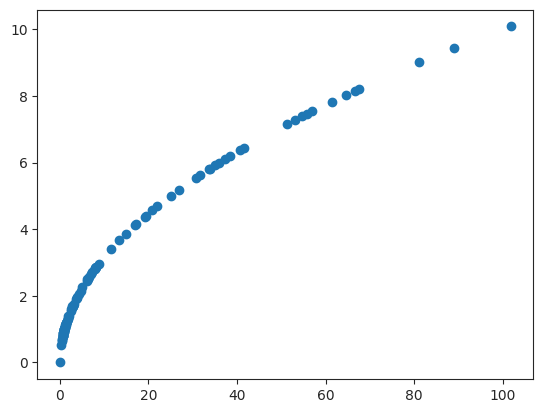

In [38]:
plt.scatter(dist_dfs['mmd']['control'],dist_dfs['pseudobulk']['control'])

In [3]:
#dist_dfs = {}
#dist_dfs['mmd'] = pd.read_csv("output/metric-comp-papalexi/mmd.csv", index_col=0)
#dist_dfs['pseudobulk'] = pd.read_csv("output/metric-comp-papalexi/pseudobulk.csv", index_col=0)
#dist_dfs['wasserstein'] = pd.read_csv("output/metric-comp-papalexi/wasserstein.csv",index_col=0)
#adata = sc.read_h5ad("output/metric-comp-papalexi/papalexi_processed_subset.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 20729 × 15987
    obs: 'hto', 'guide_id', 'hto_barcode', 'gdo_barcode', 'perturbation', 'tissue_type', 'cell_line', 'cancer', 'disease', 'perturbation_type', 'celltype', 'organism', 'nperts', 'ngenes', 'ncounts', 'percent_mito', 'percent_ribo', 'n_counts'
    var: 'ensembl_id', 'ncounts', 'ncells', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'log1p', 'neighbors', 'pca', 'processed'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [5]:
dist_dfs['edist']=ed.pairwise_pca_distances(adata, "perturbation", correction_factor=True)

100%|███████████████████████████████████████████| 99/99 [00:15<00:00,  6.36it/s]


In [14]:
pd.concat([dist_dfs[key]['control'] for key in dist_dfs], axis=1, keys =[key for key in dist_dfs] )

,mmd,pseudobulk,wasserstein,edist
perturbation,,,,
STAT2g2,7.895065,2.809816,175.851247,289.729471
CAV1g4,1.288019,1.134909,170.168108,279.924339
STAT1g2,101.799385,10.089568,291.689761,376.297493
CD86g1,0.437609,0.661520,167.724225,284.267805
IRF7g2,2.694692,1.641552,175.351337,291.156179
...,...,...,...,...
SPI1g3,8.031512,2.833992,198.331629,296.786234
PDCD1LG2g2,2.828619,1.681850,174.301280,281.524033
CUL3g3,17.039366,4.127877,206.800837,309.122421


In [25]:
adata.obs['perturbation'].value_counts()

control     2386
IFNGR2g1     579
ATF2g1       500
IFNGR1g3     416
CD86g1       401
            ... 
CUL3g3        15
SPI1g1        14
SPI1g2        10
SPI1g4         7
MYCg4          1
Name: perturbation, Length: 99, dtype: int64

In [ ]:
# ok so edists is wrong and we're going to re-run because I didn't subset properly 